<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [46]:
import wget

site_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
loan_train = wget.download(site_url)
print(loan_train)

100% [..............................................................................] 23101 / 23101loan_train (4).csv


### Load Data From CSV File


In [47]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [48]:
df.shape

(346, 10)

### Convert to date time object


In [49]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [50]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [51]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda




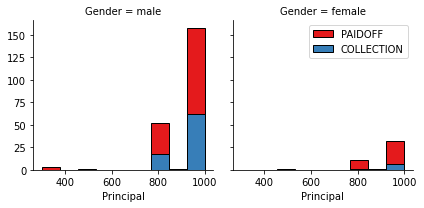

In [52]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

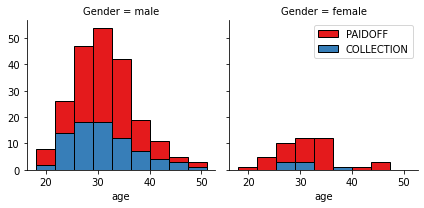

In [53]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


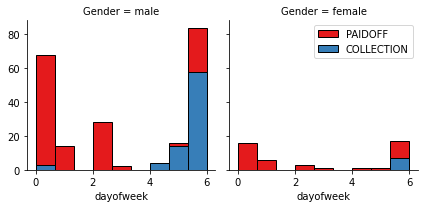

In [54]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [55]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [56]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [57]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [58]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [59]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [60]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [61]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [62]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [91]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#print('X_train:' , X_train)
#print('y_train: ' , y_train)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.68571429,
       0.71428571, 0.72857143, 0.7       , 0.68571429, 0.68571429,
       0.71428571, 0.7       , 0.72857143, 0.71428571, 0.71428571,
       0.7       , 0.7       , 0.71428571, 0.7       , 0.7       ,
       0.68571429, 0.71428571, 0.68571429, 0.78571429, 0.72857143,
       0.75714286, 0.74285714, 0.78571429, 0.78571429, 0.8       ,
       0.75714286, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.77142857, 0.77142857, 0.77142857, 0.78571429, 0.77142857,
       0.78571429, 0.78571429, 0.78571429, 0.78571429])

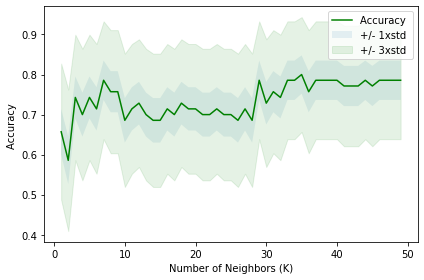

The best accuracy was with 0.8 with k= 35


In [66]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import metrics

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1,"hence let's choose this value of k")
k = mean_acc.argmax()+1
print('k = ',k)
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
print("Train set accuracy (Jaccard): ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))
print("Train set Accuracy (F1): ", f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_model.predict(X_test), average='weighted'))

The best accuracy was with 0.8 with k= 35 hence let's choose this value of k
k =  35
Train set accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.8
Train set Accuracy (F1):  0.6923471985071613
Test set Accuracy (F1):  0.7583333333333333


# Decision Tree


In [68]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

d = 10
mean_acc_dt = np.zeros((d-1))
std_acc_dt = np.zeros((d-1))

for d in range(1,d):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    y_hat_dt = dt.predict(X_test)
    mean_acc_dt[d-1] = metrics.accuracy_score(y_test, y_hat_dt)
    #print(d, accuracy_score(y_test, y_hat_dt))
    
print( "The best accuracy was with", mean_acc_dt.max(), "with d=", mean_acc_dt.argmax()+1) 

The best accuracy was with 0.7857142857142857 with d= 1


In [69]:
print("We take depth = 1")
dt = DecisionTreeClassifier(criterion="entropy", max_depth=1).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, dt.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, dt.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dt.predict(X_test), average='weighted'))

We take depth = 1
Train set Accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


# Support Vector Machine


In [70]:
from sklearn import svm
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    yhat_svm = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,yhat_svm, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


In [71]:
print("rbf kernel gives the best result")
svm_model = svm.SVC( kernel = 'rbf').fit(X_train,y_train)


print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, svm_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, svm_model.predict(X_test), average='weighted'))

rbf kernel gives the best result
Train set Accuracy (Jaccard):  0.782608695652174
Test set Accuracy (Jaccard):  0.7428571428571429
Train set Accuracy (F1):  0.7682165861513688
Test set Accuracy (F1):  0.7275882012724117


# Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    yhat_lr = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('with {} solver we get logloss = {}'.format(k, log_loss(y_test, y_prob)))

with lbfgs solver we get logloss = 0.4920179847937498
with saga solver we get logloss = 0.49201778530836365
with liblinear solver we get logloss = 0.5772287609479654
with newton-cg solver we get logloss = 0.492017801467927
with sag solver we get logloss = 0.4920140933661071


In [73]:
best_solver = 'liblinear'
lr_model = LogisticRegression(C = 0.01, solver = best_solver).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, lr_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7572463768115942
Test set Accuracy (Jaccard):  0.6857142857142857
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


# Model Evaluation using Test set


In [74]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [75]:
site_url_loan_test = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
loan_test = wget.download(site_url_loan_test)
test_df = pd.read_csv('loan_test.csv')
test_df.head()


100% [................................................................................] 3642 / 3642

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [76]:
#Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

#Add dayofweek missin field
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [77]:

#let's convert Male to 0 and Female to 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#let's convert dayofweek in weeken yes or not
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [78]:
Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)

x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)
y_loan_test = test_df['loan_status'].values

### Evaluate accuracy with the models trained using the splitted dataset

In [79]:
#jaccard list:
knn_pred = knn_model.predict(x_loan_test)
j_knn = metrics.accuracy_score(y_loan_test, knn_pred)

dt_pred = dt.predict(x_loan_test)
j_dt = metrics.accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model.predict(x_loan_test)
j_svm = metrics.accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model.predict(x_loan_test)
j_lr = metrics.accuracy_score(y_loan_test, lr_pred)

jaccard = [j_knn, j_dt, j_svm, j_lr]
jaccard

[0.7777777777777778,
 0.7407407407407407,
 0.7962962962962963,
 0.7407407407407407]

In [80]:
knn_pred = knn_model.predict(x_loan_test)
f1_knn = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt.predict(x_loan_test)
f1_dt = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model.predict(x_loan_test)
f1_svm = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model.predict(x_loan_test)
f1_lr = f1_score(y_loan_test, lr_pred, average='weighted')

f1s = [f1_knn, f1_dt, f1_svm, f1_lr]
f1s

[0.7283950617283951,
 0.6304176516942475,
 0.7583503077293734,
 0.6604267310789049]

In [81]:
from sklearn.metrics import log_loss

lr_pred = lr_model.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss = ['NA','NA','NA', aux]
log_loss

['NA', 'NA', 'NA', 0.5672153379912981]

### Accuracy Report with training splitted

In [82]:
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard, f1s, log_loss]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN,0.7777777777777778,0.7283950617283951,NA
Decision Tree,0.7407407407407407,0.6304176516942475,NA
SVM,0.7962962962962963,0.7583503077293734,NA
Logistic Regression,0.7407407407407407,0.6604267310789049,0.5672153379912981


### Let's now retrain the classifier using the whole training dataset without splitting it

In [96]:

knn_model_retrained = KNeighborsClassifier(n_neighbors=35).fit(X,y)
dt_retrained = DecisionTreeClassifier(criterion="entropy", max_depth=1).fit(X, y)
svm_model_retrained = svm.SVC( kernel = 'rbf').fit(X,y)
lr_model_retrained = LogisticRegression(C = 0.01, solver = best_solver).fit(X, y)



In [97]:
#jaccard list:
knn_pred = knn_model_retrained.predict(x_loan_test)
j_knn = metrics.accuracy_score(y_loan_test, knn_pred)

dt_pred = dt_retrained.predict(x_loan_test)
j_dt = metrics.accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model_retrained.predict(x_loan_test)
j_svm = metrics.accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model_retrained.predict(x_loan_test)
j_lr = metrics.accuracy_score(y_loan_test, lr_pred)

jaccard_retrained = [j_knn, j_dt, j_svm, j_lr]
jaccard_retrained

[0.7962962962962963,
 0.7407407407407407,
 0.7222222222222222,
 0.7407407407407407]

In [101]:
knn_pred = knn_model_retrained.predict(x_loan_test)
f1_knn = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt_retrained.predict(x_loan_test)
f1_dt = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model_retrained.predict(x_loan_test)
f1_svm = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model_retrained.predict(x_loan_test)
f1_lr = f1_score(y_loan_test, lr_pred, average='weighted')

f1s_retrained = [f1_knn, f1_dt, f1_svm, f1_lr]
f1s_retrained

[0.7427039191745074,
 0.6304176516942475,
 0.6212664277180406,
 0.6304176516942475]

In [102]:
from sklearn.metrics import log_loss

lr_pred = lr_model_retrained.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss_retrained = ['NA','NA','NA', aux]
log_loss_retrained

['NA', 'NA', 'NA', 0.5566084946309205]

### Accuracy Report retraining classifier with the whole dataset

In [103]:
index   = ["KNN retrained", "Decision Tree retrained", "SVM retrained", "Logistic Regression retrained"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard_retrained, f1s_retrained, log_loss_retrained]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN retrained,0.7962962962962963,0.7427039191745074,NA
Decision Tree retrained,0.7407407407407407,0.6304176516942475,NA
SVM retrained,0.7222222222222222,0.6212664277180406,NA
Logistic Regression retrained,0.7407407407407407,0.6304176516942475,0.5566084946309205


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.7777777777777778       | 0.7283950617283951        | NA      |
| Decision Tree      | 0.7407407407407407       | 0.6304176516942475        | NA      |
| SVM                | 0.7962962962962963       | 0.7583503077293734        | NA      |
| LogisticRegression | 0.7407407407407407       | 0.6604267310789049        | 0.5672153379912981       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
